### Gradient Descent (the Easy Way)

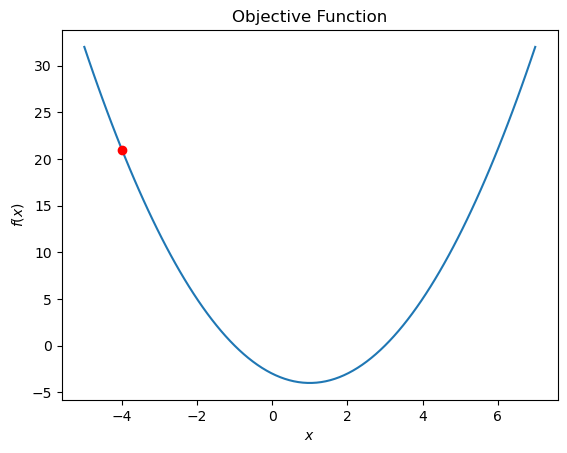

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from itertools import product

#  objective function f(x) = x² − 2x − 3
def func(x):
    return x**2 - 2*x - 3

# first derivative of f, that is, ∇f(x) = 2x − 2.
def fprime(x):
    return 2*x - 2

def plotFunc(x0):
    x = np.linspace(-5, 7, 100)
    plt.plot(x, func(x))
    plt.plot(x0, func(x0), 'ro')
    plt.xlabel('$x$')
    plt.ylabel('$f(x)$')
    plt.title('Objective Function')

def plotPath(xs, ys, x0):
    plotFunc(x0)
    plt.plot(xs, ys, linestyle='--', marker='o', color='orange')
    plt.plot(xs[-1], ys[-1], 'ro')
    
x0 = -4
plotFunc(x0)


Solution found:
  y = -4.0000
  x = 1.0000


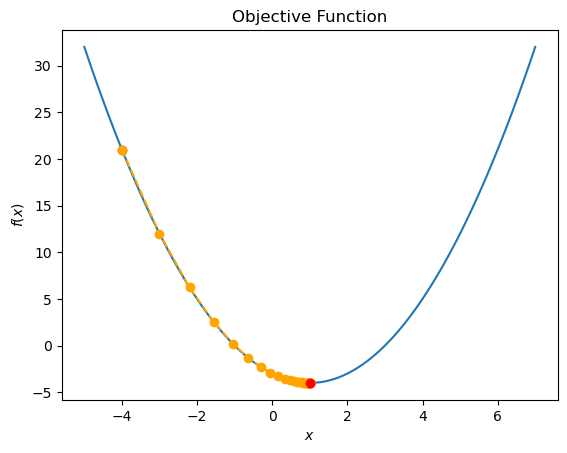

In [3]:
def GradientDescentSimple(func, fprime, x0, alpha, tol=1e-5, max_iter=1000):
    # initialize x, f(x), and -f'(x)
    xk = x0
    fk = func(xk)
    pk = -fprime(xk)
    # initialize number of steps, save x and f(x)
    num_iter = 0
    curve_x = [xk]
    curve_y = [fk]
    # take steps
    while abs(pk) > tol and num_iter < max_iter:
        # calculate new x, f(x), and -f'(x)
        xk = xk + alpha * pk
        fk = func(xk)
        pk = -fprime(xk)
        # increase number of steps by 1, save new x and f(x)
        num_iter += 1
        curve_x.append(xk)
        curve_y.append(fk)
    # print results
    if num_iter == max_iter:
        print('Gradient descent does not converge.')
    else:
        print('Solution found:\n  y = {:.4f}\n  x = {:.4f}'.format(fk, xk))
    
    return curve_x, curve_y

xs, ys = GradientDescentSimple(func, fprime, x0, alpha=0.1)
plotPath(xs, ys, x0)

Solution found:
  y = -4.0000
  x = 1.0000


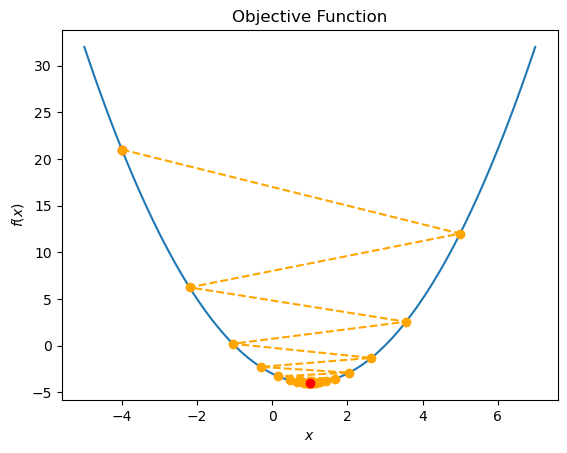

In [4]:
xs, ys = GradientDescentSimple(func, fprime, x0, alpha=0.9)
plotPath(xs, ys, x0)

Gradient descent does not converge.


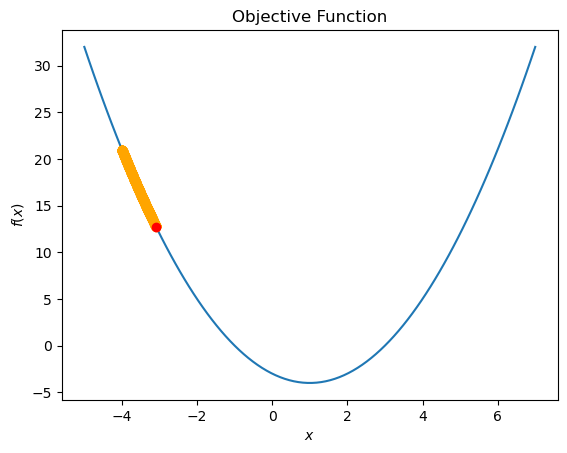

In [5]:
xs, ys = GradientDescentSimple(func, fprime, x0, alpha=1e-4)
plotPath(xs, ys, x0)

In [ ]:
f(x, y) = 10x4 − 20x2y + x2 + 10y2 − 2x + 1.


In [ ]:
fx_y = (10 * pow(x, 4)) - (20 * pow(x, 2) * y) + pow(x, 2) + (10 * pow(y, 2)) - (2 * x) + 1

dy_dx = ( -20 * (pow(x, 3)) - x ) / ((10 * y) - (20 * x))

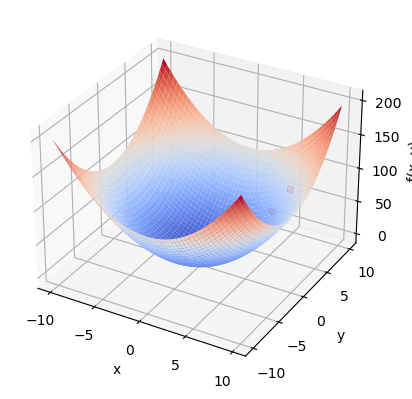

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the function to be minimized (a simple quadratic function)
def f(x, y):
    return x**2 + y**2

# Define the partial derivatives of the function with respect to x and y
def df_dx(x, y):
    return 2 * x

def df_dy(x, y):
    return 2 * y

# Define the gradient descent algorithm
def gradient_descent(start_x, start_y, learning_rate, num_iterations):
    # Initialize the parameters
    x = start_x
    y = start_y
    history = []
    
    # Perform the gradient descent iterations
    for i in range(num_iterations):
        # Calculate the gradients
        grad_x = df_dx(x, y)
        grad_y = df_dy(x, y)
        
        # Update the parameters
        x = x - learning_rate * grad_x
        y = y - learning_rate * grad_y
        
        # Save the history of the parameters
        history.append((x, y, f(x, y)))
    
    return x, y, f(x, y), history

# Define the meshgrid for plotting the function
x_range = np.arange(-10, 10, 0.1)
y_range = np.arange(-10, 10, 0.1)
X, Y = np.meshgrid(x_range, y_range)
Z = f(X, Y)

# Perform gradient descent and plot the results
start_x, start_y = 8, 8
learning_rate = 0.1
num_iterations = 20
x_opt, y_opt, f_opt, history = gradient_descent(start_x, start_y, learning_rate, num_iterations)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='coolwarm')
ax.scatter(*zip(*history), c='r', marker='o')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
plt.show()